In [4]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [5]:
from keras.datasets import mnist
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [6]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [7]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [8]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2,epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4362 - acc: 0.8853 - val_loss: 0.2125 - val_acc: 0.9435
Epoch 2/10
 - 1s - loss: 0.1858 - acc: 0.9464 - val_loss: 0.1517 - val_acc: 0.9574
Epoch 3/10
 - 1s - loss: 0.1314 - acc: 0.9628 - val_loss: 0.1226 - val_acc: 0.9647
Epoch 4/10
 - 1s - loss: 0.0993 - acc: 0.9716 - val_loss: 0.1089 - val_acc: 0.9683
Epoch 5/10
 - 1s - loss: 0.0790 - acc: 0.9776 - val_loss: 0.0966 - val_acc: 0.9708
Epoch 6/10
 - 1s - loss: 0.0641 - acc: 0.9820 - val_loss: 0.0938 - val_acc: 0.9713
Epoch 7/10
 - 1s - loss: 0.0526 - acc: 0.9855 - val_loss: 0.0885 - val_acc: 0.9732
Epoch 8/10
 - 1s - loss: 0.0450 - acc: 0.9878 - val_loss: 0.0836 - val_acc: 0.9753
Epoch 9/10
 - 1s - loss: 0.0373 - acc: 0.9905 - val_loss: 0.0837 - val_acc: 0.9760
Epoch 10/10
 - 1s - loss: 0.0308 - acc: 0.9922 - val_loss: 0.0783 - val_acc: 0.9771


In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

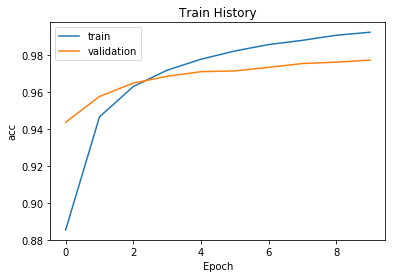

In [15]:
show_train_history(train_history,'acc','val_acc')

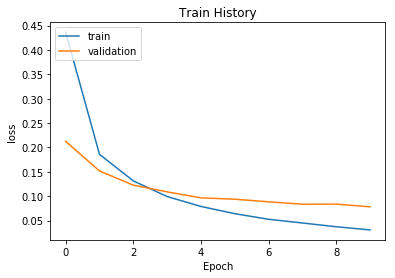

In [16]:
show_train_history(train_history,'loss','val_loss')

In [17]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 17us/step

accuracy= 0.9779


In [19]:
prediction=model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx], cmap='binary')
        title = 'label=' + str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

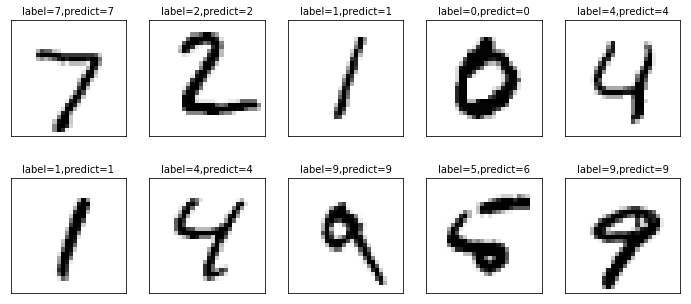

In [21]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=0)

In [23]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,3,1,0,1,1,2,0
1,0,1126,2,1,0,1,2,0,3,0
2,4,1,1012,2,1,0,2,3,6,1
3,0,1,4,995,0,1,0,2,2,5
4,1,0,4,0,966,0,1,1,2,7
5,3,0,0,13,1,856,6,1,8,4
6,6,3,2,2,6,3,931,0,5,0
7,1,5,13,5,0,0,0,995,2,7
8,4,0,5,7,2,3,1,2,948,2


In [24]:
df=pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [26]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2810,5,3
3902,5,3
4300,5,3
4355,5,3
4360,5,3
5937,5,3


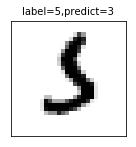

In [27]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

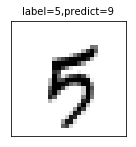

In [28]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1289,num=1)